# **Endinanda, F. - Capstone Project 2 - Data Analysis**

## Context

Northwind is a food and beverages distributing company. Provided with the database which gives details on the products and chosen as the focus analysis. With analyzing the data, this will provide business insights in the future. 

## **Connecting to Database**

In [1]:
# Import modules

import numpy as np
import pandas as pd
import mysql.connector as sqlcon

In [2]:
# Connect to database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'xxxxxx',
    database = 'northwind',
    auth_plugin='mysql_native_password' #for workbench password connection macOS
)

In [40]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

In [4]:
sql_table(
'show tables;'
)

Tables_in_northwind
0             Categories
1   CustomerCustomerDemo
2   CustomerDemographics
3              Customers
4              Employees
5    EmployeeTerritories
6           OrderDetails
7                 Orders
8               Products
9                 Region
10              Shippers
11             Suppliers
12           Territories

## Database Information

The Northwind database provides data of transaction of a company in detail. 

Source:
https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Database has 13 tables, with 2 tables being empty.

Categories: Showing different types menu that is available by their categories\
CustomerCustomerDemo: No data\
CustomerDemographics: No data\
Customers: Showing the detail information of the customers\
Employees: Employee details, salary and title\
EmployeeTerritories: EmployeeID and territoryID\
OrderDetails: The unit price, quantity of order and product ID\
Orders: Order details including dates, destination, customer, and employeed that handled it\
Products: Product transaction details\
Region: Region ID description\
Shippers: Shipper details\
Suppliers: Supplier details\
Territories: Teritory description

The tables described above are all connected directly or indirectly.


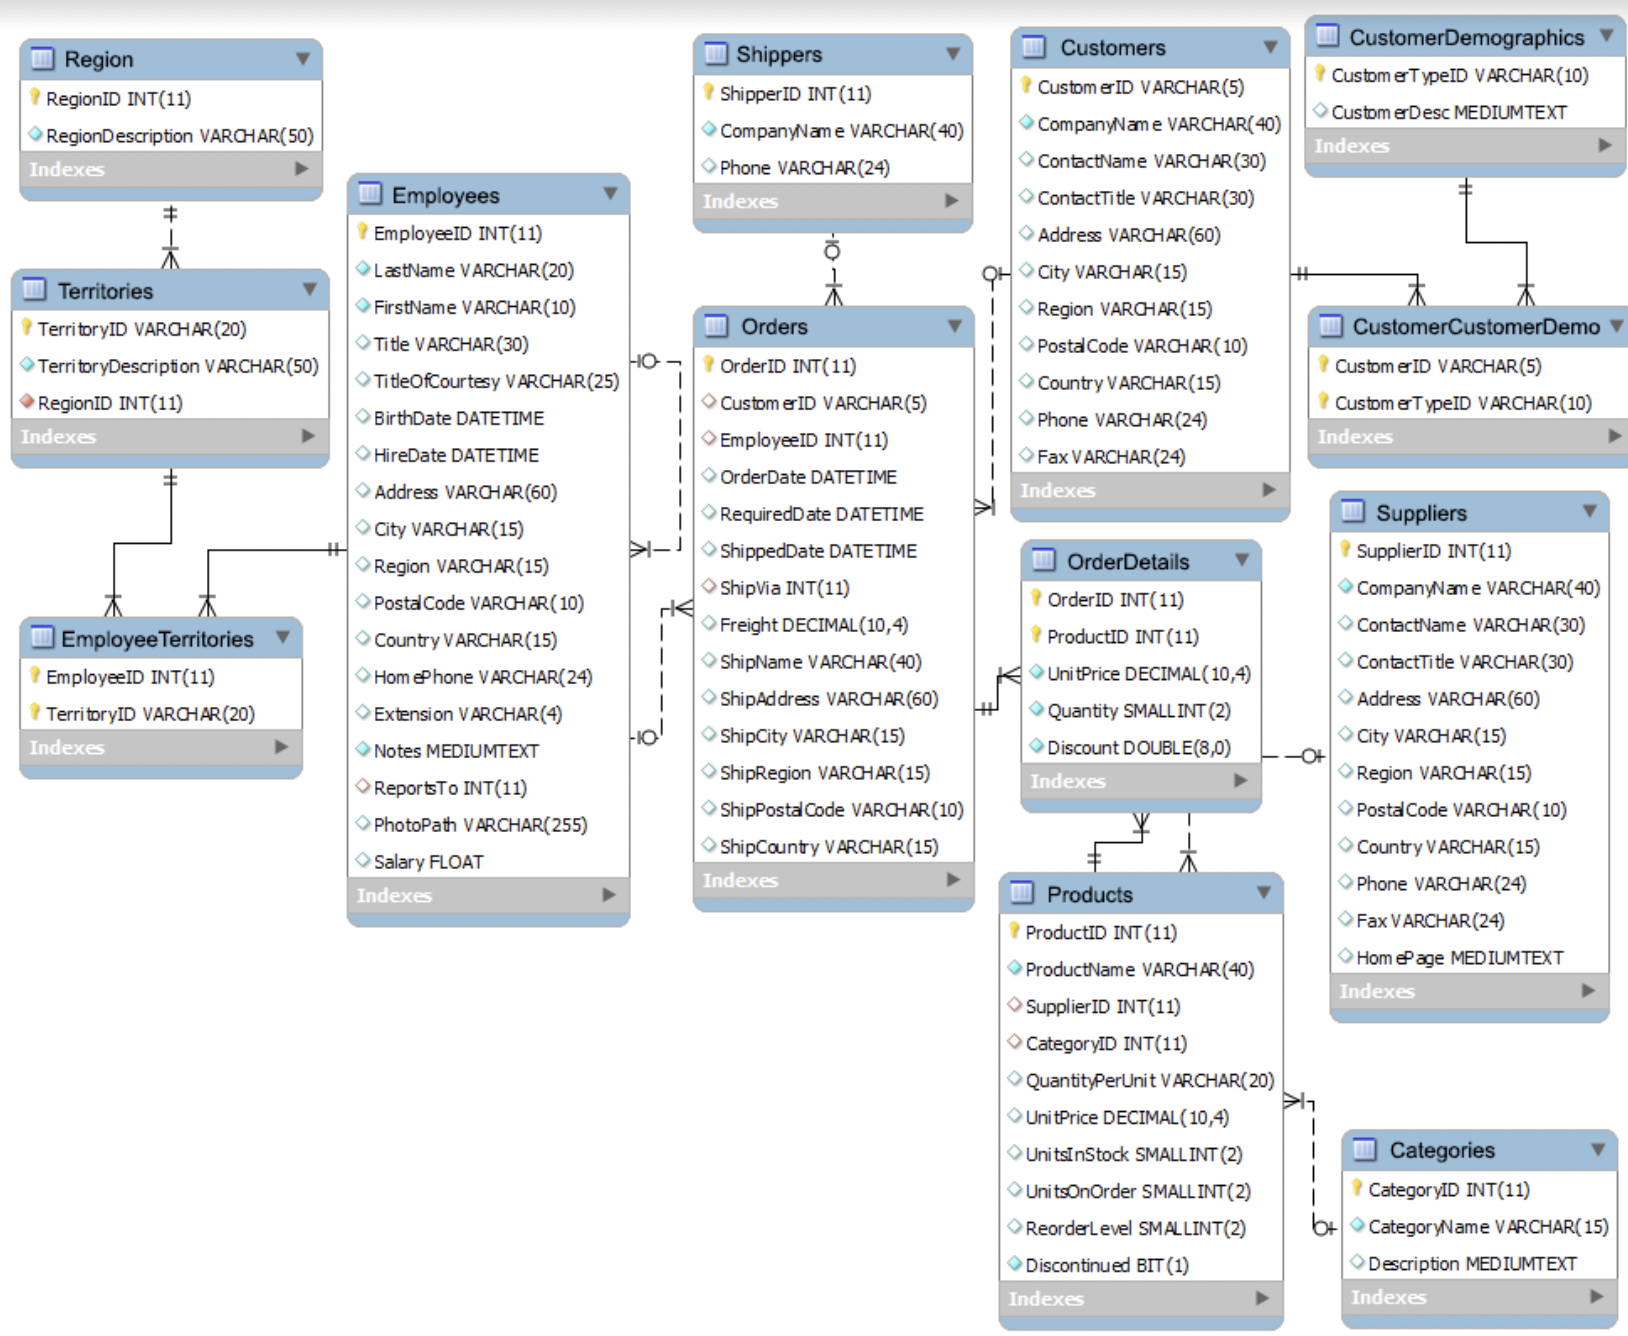

In [5]:
df = sql_table(
'''select p.ProductName, ca.CategoryName, p.QuantityPerUnit, 
p.UnitsInStock, s.CompanyName as Supplier, od.UnitPrice as Buy_Price,
p.UnitPrice as Sell_Price, p.UnitsOnOrder, c.CompanyName as Costumer, 
c.Country, od.Quantity as Order_Quantity, p.ReorderLevel, p.Discontinued

    from Products p
    left join orderdetails od on p.productID = od.productID
    left join orders o on od.orderID = o.orderID
    left join customers c on o.customerID = c.customerID
    left join categories ca on p.categoryID = ca.categoryID
    left join suppliers s on p.supplierID = s.supplierID
    ;'''
)
df.head()

ProductName CategoryName     QuantityPerUnit  UnitsInStock        Supplier  \
0        Chai    Beverages  10 boxes x 20 bags            39  Exotic Liquids   
1        Chai    Beverages  10 boxes x 20 bags            39  Exotic Liquids   
2        Chai    Beverages  10 boxes x 20 bags            39  Exotic Liquids   
3        Chai    Beverages  10 boxes x 20 bags            39  Exotic Liquids   
4        Chai    Beverages  10 boxes x 20 bags            39  Exotic Liquids   

  Buy_Price Sell_Price  UnitsOnOrder                    Costumer  Country  \
0   14.4000    18.0000             0                  QUICK-Stop  Germany   
1   14.4000    18.0000             0  Rattlesnake Canyon Grocery      USA   
2   14.4000    18.0000             0    Lonesome Pine Restaurant      USA   
3   14.4000    18.0000             0           Die Wandernde Kuh  Germany   
4   14.4000    18.0000             0    Pericles Comidas clsicas   Mexico   

   Order_Quantity  ReorderLevel  Discontinued  
0              45            10             0  
1              18            10             0  
2              20            10             0  
3              15            10             0  
4              12            10             0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductName      2155 non-null   object
 1   CategoryName     2155 non-null   object
 2   QuantityPerUnit  2155 non-null   object
 3   UnitsInStock     2155 non-null   int64 
 4   Supplier         2155 non-null   object
 5   Buy_Price        2155 non-null   object
 6   Sell_Price       2155 non-null   object
 7   UnitsOnOrder     2155 non-null   int64 
 8   Costumer         2155 non-null   object
 9   Country          2155 non-null   object
 10  Order_Quantity   2155 non-null   int64 
 11  ReorderLevel     2155 non-null   int64 
 12  Discontinued     2155 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 219.0+ KB


In [7]:
df.isna().sum()/len(df)*100

ProductName        0.0
CategoryName       0.0
QuantityPerUnit    0.0
UnitsInStock       0.0
Supplier           0.0
Buy_Price          0.0
Sell_Price         0.0
UnitsOnOrder       0.0
Costumer           0.0
Country            0.0
Order_Quantity     0.0
ReorderLevel       0.0
Discontinued       0.0
dtype: float64

In [8]:
#changing unit price to float
df['Buy_Price'] = df['Buy_Price'].astype(np.float16)
df['Sell_Price'] = df['Sell_Price'].astype(np.float16)

In [9]:
df[df.duplicated()].head()

ProductName CategoryName     QuantityPerUnit  \
37                              Chai    Beverages  10 boxes x 20 bags   
62                             Chang    Beverages  24 - 12 oz bottles   
160  Uncle Bob's Organic Dried Pears      Produce     12 - 1 lb pkgs.   
189                            Ikura      Seafood    12 - 200 ml jars   
365                          Pavlova  Confections    32 - 500 g boxes   

     UnitsInStock                   Supplier  Buy_Price  Sell_Price  \
37             39             Exotic Liquids  18.000000   18.000000   
62             17             Exotic Liquids  19.000000   19.000000   
160            15  Grandma Kelly's Homestead  30.000000   30.000000   
189            31              Tokyo Traders  24.796875   31.000000   
365            29              Pavlova, Ltd.  17.453125   17.453125   

     UnitsOnOrder                Costumer  Country  Order_Quantity  \
37              0     Lehmanns Marktstand  Germany              40   
62             40          Wolski  Zajazd   Poland              10   
160             0      Reggiani Caseifici    Italy              20   
189             0    Victuailles en stock   France              20   
365             0  Old World Delicatessen      USA              50   

     ReorderLevel  Discontinued  
37             10             0  
62             25             0  
160            10             0  
189             0             0  
365            10             0

In [10]:
df.drop_duplicates(inplace = True)
df

ProductName CategoryName     QuantityPerUnit  \
0                              Chai    Beverages  10 boxes x 20 bags   
1                              Chai    Beverages  10 boxes x 20 bags   
2                              Chai    Beverages  10 boxes x 20 bags   
3                              Chai    Beverages  10 boxes x 20 bags   
4                              Chai    Beverages  10 boxes x 20 bags   
...                             ...          ...                 ...   
2150  Original Frankfurter grne Soe   Condiments            12 boxes   
2151  Original Frankfurter grne Soe   Condiments            12 boxes   
2152  Original Frankfurter grne Soe   Condiments            12 boxes   
2153  Original Frankfurter grne Soe   Condiments            12 boxes   
2154  Original Frankfurter grne Soe   Condiments            12 boxes   

      UnitsInStock                         Supplier  Buy_Price  Sell_Price  \
0               39                   Exotic Liquids  14.398438        18.0   
1               39                   Exotic Liquids  14.398438        18.0   
2               39                   Exotic Liquids  14.398438        18.0   
3               39                   Exotic Liquids  14.398438        18.0   
4               39                   Exotic Liquids  14.398438        18.0   
...            ...                              ...        ...         ...   
2150            32  Plutzer Lebensmittelgromrkte AG  13.000000        13.0   
2151            32  Plutzer Lebensmittelgromrkte AG  13.000000        13.0   
2152            32  Plutzer Lebensmittelgromrkte AG  13.000000        13.0   
2153            32  Plutzer Lebensmittelgromrkte AG  13.000000        13.0   
2154            32  Plutzer Lebensmittelgromrkte AG  13.000000        13.0   

      UnitsOnOrder                    Costumer  Country  Order_Quantity  \
0                0                  QUICK-Stop  Germany              45   
1                0  Rattlesnake Canyon Grocery      USA              18   
2                0    Lonesome Pine Restaurant      USA              20   
3                0           Die Wandernde Kuh  Germany              15   
4                0    Pericles Comidas clsicas   Mexico              12   
...            ...                         ...      ...             ...   
2150             0  Rattlesnake Canyon Grocery      USA              30   
2151             0                Sant Gourmet   Norway              18   
2152             0              Franchi S.p.A.    Italy              10   
2153             0               Queen Cozinha   Brazil              28   
2154             0  Rattlesnake Canyon Grocery      USA               2   

      ReorderLevel  Discontinued  
0               10             0  
1               10             0  
2               10             0  
3               10             0  
4               10             0  
...            ...           ...  
2150            15             0  
2151            15             0  
2152            15             0  
2153            15             0  
2154            15             0  

[2136 rows x 13 columns]

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [ProductName, CategoryName, QuantityPerUnit, UnitsInStock, Supplier, Buy_Price, Sell_Price, UnitsOnOrder, Costumer, Country, Order_Quantity, ReorderLevel, Discontinued]
Index: []

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#Northwind products are food and beverages
df['CategoryName'].unique()

array(['Beverages', 'Condiments', 'Produce', 'Meat/Poultry', 'Seafood',
       'Dairy Products', 'Confections', 'Grains/Cereals'], dtype=object)

In [14]:
#Total product in each category

df.groupby(['CategoryName']).agg({'ProductName': 'nunique', 'UnitsInStock': 'sum','Buy_Price': 'sum', 'Sell_Price': 'sum'})


ProductName  UnitsInStock  Buy_Price  Sell_Price
CategoryName                                                    
Beverages                12         18020    11752.0     12544.0
Condiments               12         10357     4572.0      4856.0
Confections              13          7837     7464.0      7988.0
Dairy Products           10         13398     9832.0     10528.0
Grains/Cereals            7          7009     4144.0      4420.0
Meat/Poultry              6          4696     7420.0      7936.0
Produce                   5          2880     4756.0      5052.0
Seafood                  12         21095     6176.0      6520.0

<AxesSubplot:>

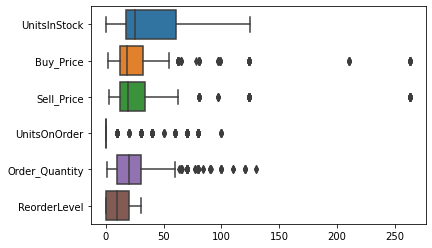

In [16]:
#Seeing Outliers
columns = ('UnitsInStock', 'Buy_Price', 'Sell_Price', 'UnitsOnOrder',
'Order_Quantity', 'ReorderLevel')
sns.boxplot(data=df.drop('Discontinued', axis = 1), orient='h')


In [17]:
#Top 5 Best Seller Product

df.groupby(['ProductName','CategoryName']).sum()['Order_Quantity']\
.sort_values(ascending = False).head()
                                                                                            

ProductName             CategoryName  
Camembert Pierrot       Dairy Products    1577
Raclette Courdavault    Dairy Products    1496
Gorgonzola Telino       Dairy Products    1327
Gnocchi di nonna Alice  Grains/Cereals    1263
Rhnbru Klosterbier      Beverages         1155
Name: Order_Quantity, dtype: int64

<AxesSubplot:ylabel='CategoryName'>

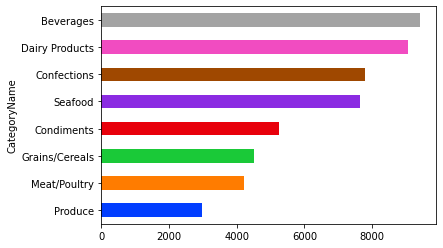

In [39]:
#Top 5 Best Seller by Category
df.groupby('CategoryName').sum()['Order_Quantity']\
.sort_values(ascending = True).plot.barh(color = sns.color_palette('bright'))
                                                                                                 

<AxesSubplot:xlabel='Costumer'>

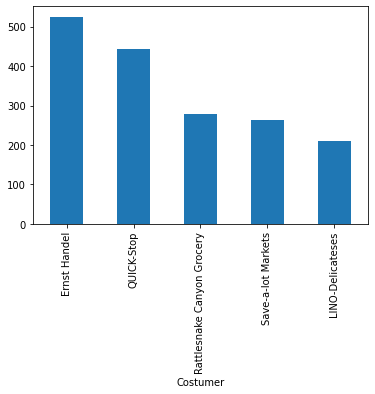

In [19]:
#Top 5 Customer filter reorderlevel, then transaction quantity

df[df['ReorderLevel']==max(df['ReorderLevel'])]\
.groupby('Costumer').sum()['Order_Quantity']\
.sort_values(ascending = False).head().plot.bar()

<AxesSubplot:xlabel='ProductName'>

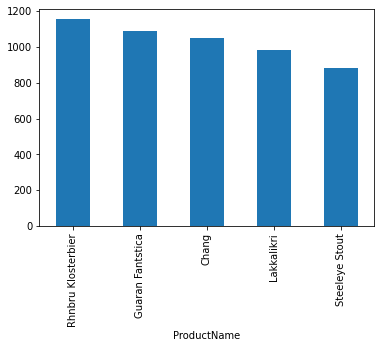

In [20]:
# Top Beverages
df[df['CategoryName']=='Beverages']\
.groupby('ProductName').sum()['Order_Quantity']\
.sort_values(ascending = False).head().plot.bar()


In [21]:
# Top Lowest UnitsOnOrder. Currently high stock but low on order which should be discounted to keep profit
df_stockorder = df.groupby("ProductName")\
.agg({"UnitsInStock" : "sum", "UnitsOnOrder" : "sum"})
df_stockorder.sort_values(by = ["UnitsInStock", "UnitsOnOrder"]\
, ascending = [False, True]).head()


UnitsInStock  UnitsOnOrder
ProductName                                                
Rhnbru Klosterbier                       5750             0
Boston Crab Meat                         5043             0
Raclette Courdavault                     4266             0
Jack's New England Clam Chowder          3995             0
Pt chinois                               3795             0

In [22]:
# Average price per category, sorted from the expensive to cheap

df.groupby('CategoryName').mean()[['Buy_Price','Sell_Price']]\
.sort_values(by = 'Buy_Price',ascending = False)



Buy_Price  Sell_Price
CategoryName                         
Meat/Poultry    42.875000   45.875000
Produce         35.218750   37.437500
Beverages       29.390625   31.359375
Dairy Products  27.093750   29.000000
Confections     22.625000   24.203125
Condiments      21.375000   22.687500
Grains/Cereals  21.359375   22.781250
Seafood         18.890625   19.937500

<AxesSubplot:>

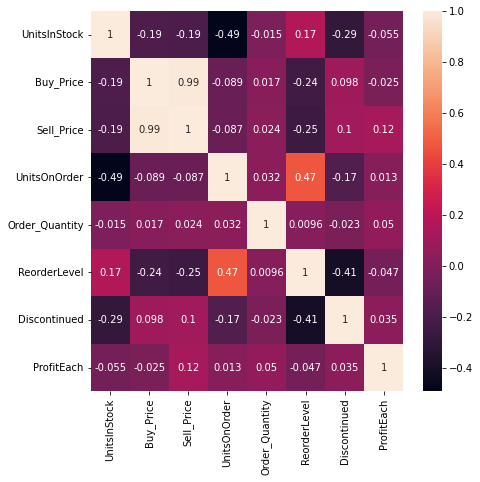

In [24]:
#Correlation of Numerical Data
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(method = 'spearman'), annot=True)

#ReorderLevel with UnitsonOrder (positive) Order banyak, reorder tinggi
#UnitsInStock with UnitsOnOrder (negative) Stock banyak, on order dikit
#ReorderLevel with Discontinued (negative) Reorder sedikit, discontinue
#Unitinstock with Discontinuedd (negative) Stock banyak order dikit


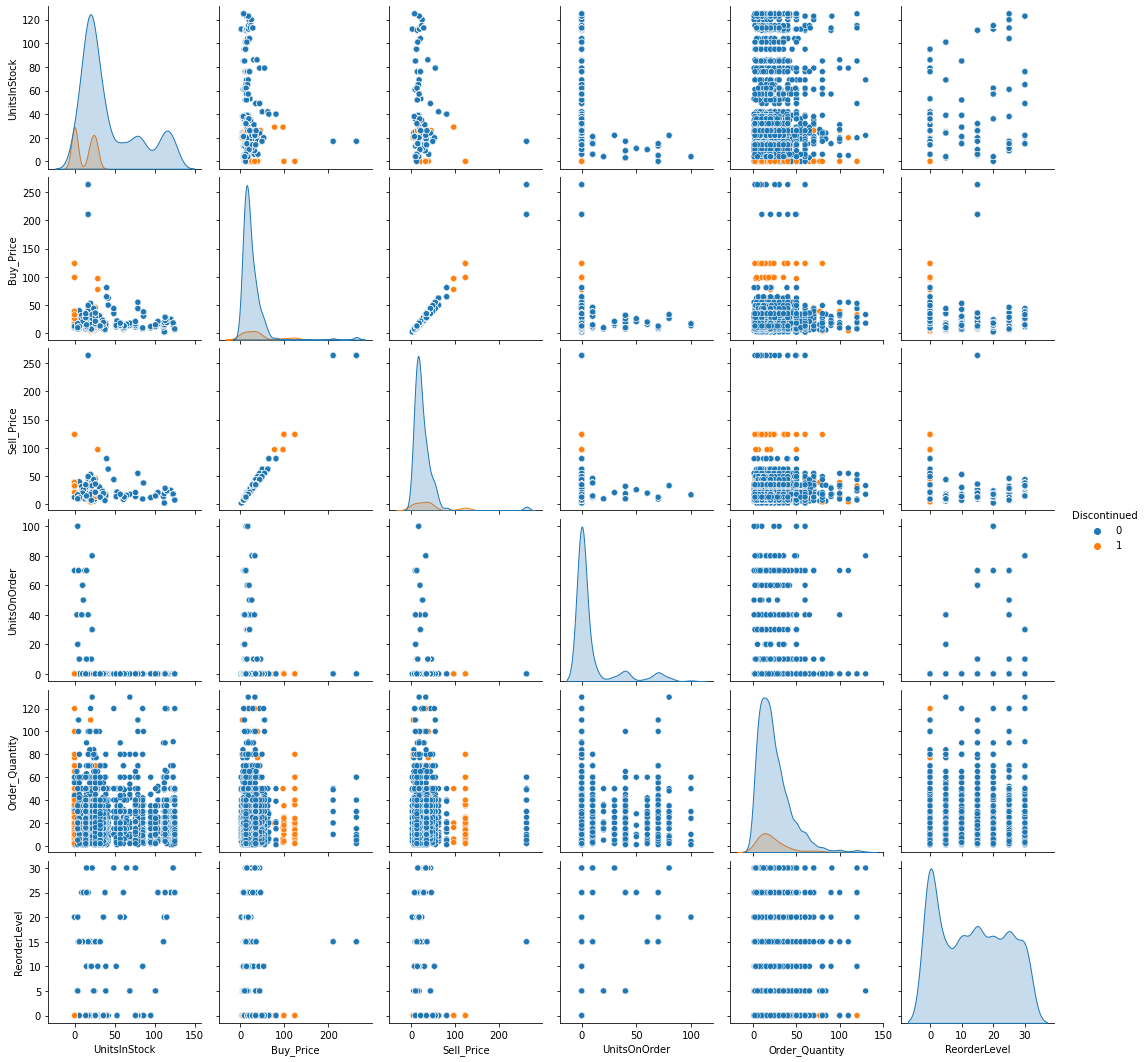

In [15]:
#Correlation of data with Discontinued Markers 0 or 1
sns.pairplot(df,hue='Discontinued')

In [23]:
df['ProfitEach'] = df['Sell_Price']-df['Buy_Price'] 

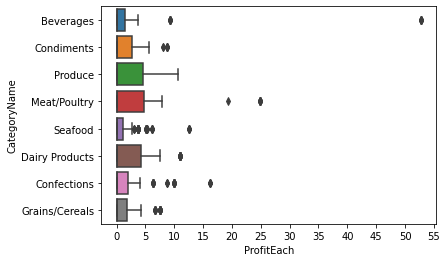

In [25]:
sns.boxplot(data=df[['ProfitEach','CategoryName']], y='CategoryName', x='ProfitEach')
plt.xticks(range(0, 56,5))
plt.show()

In [27]:
# Uji Perbandingan Nilai ProfitEach Antar Setiap Product Line (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    df[df['CategoryName'] == 'Beverages']['ProfitEach'],
    df[df['CategoryName'] == 'Condiments']['ProfitEach'],
    df[df['CategoryName'] == 'Produce']['ProfitEach'],
    df[df['CategoryName'] == 'Meat/Poultry']['ProfitEach'],
    df[df['CategoryName'] == 'Seafood']['ProfitEach'],
    df[df['CategoryName'] == 'Dairy Products']['ProfitEach'],
    df[df['CategoryName'] == 'Confections']['ProfitEach'],
    df[df['CategoryName'] == 'Grains/Cereals']['ProfitEach']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus*100} % < 5%)')
    print ('Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus*100} % > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada')

Tolak H0 Karena P-Value (2.0478908277421417 % < 5%)
Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada


In [28]:
df.to_csv('DF.csv')

In [29]:
df.groupby('Country').sum()['Order_Quantity']\
.sort_values(ascending = False).head()

Country
USA        9238
Germany    9113
Austria    5167
Brazil     4173
France     3234
Name: Order_Quantity, dtype: int64

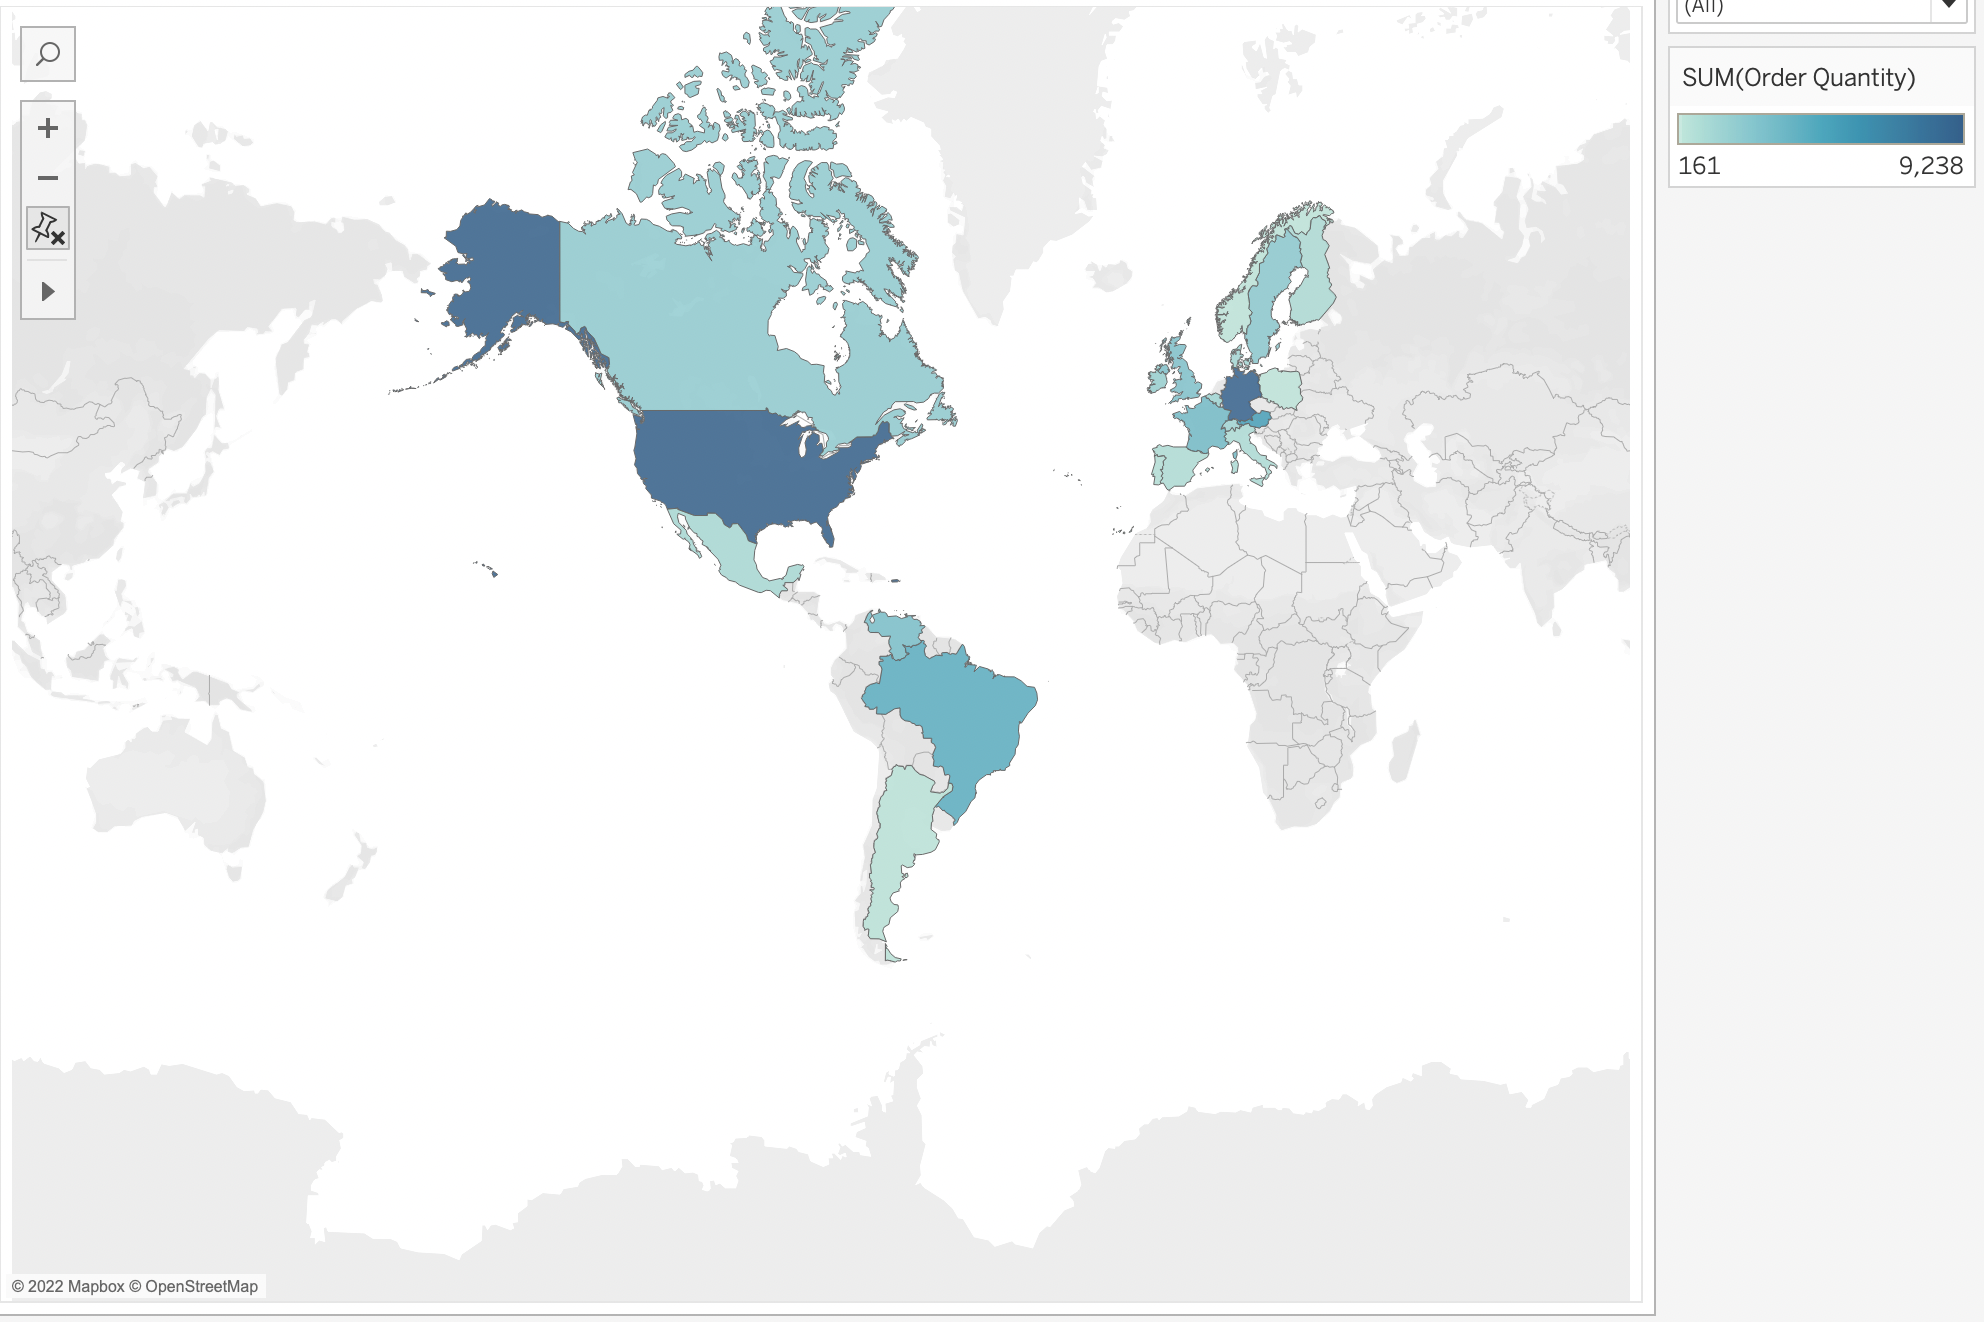